In [ ]:
! pip install -q kaggle


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/MyDrive/Kaggle'
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [3]:

import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , Normalizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import norm
from scipy import stats
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
df=pd.read_csv('/content/gdrive/MyDrive/Kaggle/Covid Dataset.csv')

pd.pandas.set_option('display.max_columns',None)


In [4]:
df.head(20)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes
5,Yes,Yes,Yes,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No,Yes
6,Yes,Yes,Yes,No,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,No,Yes
7,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Yes,Yes,No,Yes,Yes,No,No,Yes,No,No,No,Yes
8,Yes,Yes,Yes,No,Yes,No,Yes,No,No,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,No,Yes
9,Yes,Yes,Yes,No,No,Yes,No,No,No,Yes,Yes,Yes,No,No,No,No,Yes,No,No,No,Yes


In [5]:
df.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [6]:

for i in df.columns:
    print("\nColumn Name:",i,"-->",df[i].unique(),"-->Unique Count",len(df[i].unique()))


Column Name: Breathing Problem --> ['Yes' 'No'] -->Unique Count 2

Column Name: Fever --> ['Yes' 'No'] -->Unique Count 2

Column Name: Dry Cough --> ['Yes' 'No'] -->Unique Count 2

Column Name: Sore throat --> ['Yes' 'No'] -->Unique Count 2

Column Name: Running Nose --> ['Yes' 'No'] -->Unique Count 2

Column Name: Asthma --> ['No' 'Yes'] -->Unique Count 2

Column Name: Chronic Lung Disease --> ['No' 'Yes'] -->Unique Count 2

Column Name: Headache --> ['No' 'Yes'] -->Unique Count 2

Column Name: Heart Disease --> ['No' 'Yes'] -->Unique Count 2

Column Name: Diabetes --> ['Yes' 'No'] -->Unique Count 2

Column Name: Hyper Tension --> ['Yes' 'No'] -->Unique Count 2

Column Name: Fatigue  --> ['Yes' 'No'] -->Unique Count 2

Column Name: Gastrointestinal  --> ['Yes' 'No'] -->Unique Count 2

Column Name: Abroad travel --> ['No' 'Yes'] -->Unique Count 2

Column Name: Contact with COVID Patient --> ['Yes' 'No'] -->Unique Count 2

Column Name: Attended Large Gathering --> ['No' 'Yes'] -->Uniqu

In [7]:
df.describe()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2
top,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,Yes,No,No,Yes,No,Yes,No,No,No,Yes
freq,3620,4273,4307,3953,2952,2920,2869,2736,2911,2846,2771,2821,2883,2983,2726,2924,2820,3172,5434,5434,4383


In [8]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df=df.apply(l.fit_transform).astype(int)

In [9]:
df

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,0,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,1,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1
5430,1,1,1,0,1,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,1
5431,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
5432,1,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
df.head(2)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1


In [ ]:
df.head(2)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1


In [ ]:
df.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

##mapping
yes=1

no=0

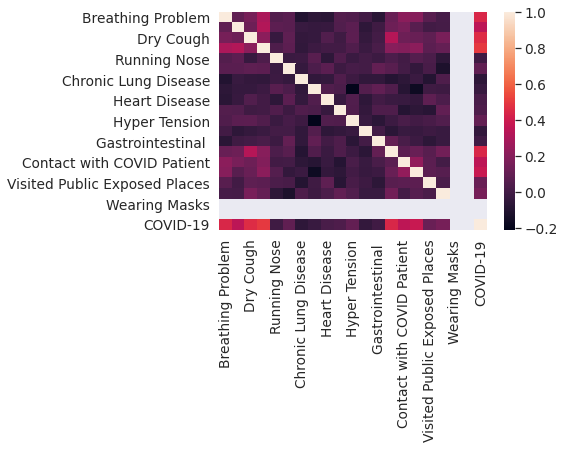

In [ ]:

import seaborn as sns
sns.set(font_scale=1.25)
sns.heatmap(df.corr())

In [ ]:
df.corr()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.055190,0.075318,-0.098291,-0.062172,-0.073366,0.055427,0.045256,0.000561,-0.075390,0.117795,0.214634,0.200304,0.066688,0.018295,NaN,NaN,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.081758,0.073953,-0.025160,-0.035416,-0.031462,0.050286,0.079001,-0.060458,-0.008067,0.128726,0.164704,0.070490,0.002252,0.012102,NaN,NaN,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,-0.030763,0.086843,-0.043664,-0.035912,0.047566,-0.006593,0.081989,-0.039909,0.008251,0.331418,0.128330,0.117963,0.086176,0.163102,NaN,NaN,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.039450,0.081377,-0.050440,-0.015971,0.002177,0.001938,0.042811,-0.023290,0.025886,0.205986,0.189251,0.216438,0.079055,0.104378,NaN,NaN,0.502848
Running Nose,0.055190,0.081758,-0.030763,0.039450,1.000000,-0.022763,-0.014376,0.068479,-0.056750,0.042961,-0.020445,0.007026,-0.014673,0.034526,0.003776,0.061099,0.032568,-0.061323,NaN,NaN,-0.005657
Asthma,0.075318,0.073953,0.086843,0.081377,-0.022763,1.000000,-0.033771,0.037064,0.076783,-0.012060,0.017707,0.006564,0.101909,0.068286,0.005046,-0.044592,0.020941,-0.115679,NaN,NaN,0.089930
Chronic Lung Disease,-0.098291,-0.025160,-0.043664,-0.050440,-0.014376,-0.033771,1.000000,-0.050480,-0.039860,0.046789,-0.010331,-0.047655,-0.050333,-0.088854,-0.062482,-0.020548,-0.093049,0.038343,NaN,NaN,-0.056837
Headache,-0.062172,-0.035416,-0.035912,-0.015971,0.068479,0.037064,-0.050480,1.000000,0.048471,0.032390,-0.207489,0.052035,0.097778,0.043589,-0.082101,-0.162992,-0.005790,-0.012625,NaN,NaN,-0.027793
Heart Disease,-0.073366,-0.031462,0.047566,0.002177,-0.056750,0.076783,-0.039860,0.048471,1.000000,-0.032956,0.049139,-0.058925,0.004121,-0.020761,-0.025593,-0.045437,0.086169,0.035000,NaN,NaN,0.027072
Diabetes,0.055427,0.050286,-0.006593,0.001938,0.042961,-0.012060,0.046789,0.032390,-0.032956,1.000000,0.042543,-0.043903,0.040651,0.039013,-0.085696,-0.061650,-0.078212,0.097696,NaN,NaN,0.040627


In [11]:
X=df.drop(['COVID-19'],axis=1)
y=df['COVID-19']

In [13]:
df.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [12]:
X.shape

(5434, 20)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
import warnings
import itertools

import matplotlib.pyplot as plt

import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import learning_curve
from sklearn.base import clone
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.utils import deprecated
from scipy import interp



In [ ]:
def plot_roc_curve(y_true, y_probas, title='ROC Curves',
                   curves=('micro', 'macro', 'each_class'),
                   ax=None, figsize=None, cmap='nipy_spectral',
                   title_fontsize="large", text_fontsize="medium"):
    
    y_true = np.array(y_true)
    y_probas = np.array(y_probas)

    if 'micro' not in curves and 'macro' not in curves and \
            'each_class' not in curves:
        raise ValueError('Invalid argument for curves as it '
                         'only takes "micro", "macro", or "each_class"')

    classes = np.unique(y_true)
    probas = y_probas

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_true, probas[:, i],
                                      pos_label=classes[i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    micro_key = 'micro'
    i = 0
    while micro_key in fpr:
        i += 1
        micro_key += str(i)

    y_true = label_binarize(y_true, classes=classes)
    if len(classes) == 2:
        y_true = np.hstack((1 - y_true, y_true))

    fpr[micro_key], tpr[micro_key], _ = roc_curve(y_true.ravel(),
                                                  probas.ravel())
    roc_auc[micro_key] = auc(fpr[micro_key], tpr[micro_key])

    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[x] for x in range(len(classes))]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(len(classes)):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= len(classes)

    macro_key = 'macro'
    i = 0
    while macro_key in fpr:
        i += 1
        macro_key += str(i)
    fpr[macro_key] = all_fpr
    tpr[macro_key] = mean_tpr
    roc_auc[macro_key] = auc(fpr[macro_key], tpr[macro_key])

    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)

    ax.set_title(title, fontsize=title_fontsize)

    if 'each_class' in curves:
        for i in range(len(classes)):
            color = plt.cm.get_cmap(cmap)(float(i) / len(classes))
            ax.plot(fpr[i], tpr[i], lw=2, color=color,
                    label='ROC curve of class {0} (area = {1:0.2f})'
                    ''.format(classes[i], roc_auc[i]))

    if 'micro' in curves:
        ax.plot(fpr[micro_key], tpr[micro_key],
                label='micro-average ROC curve '
                      '(area = {0:0.2f})'.format(roc_auc[micro_key]),
                color='deeppink', linestyle=':', linewidth=4)

    if 'macro' in curves:
        ax.plot(fpr[macro_key], tpr[macro_key],
                label='macro-average ROC curve '
                      '(area = {0:0.2f})'.format(roc_auc[macro_key]),
                color='navy', linestyle=':', linewidth=4)

    ax.plot([0, 1], [0, 1], 'k--', lw=2)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate', fontsize=text_fontsize)
    ax.set_ylabel('True Positive Rate', fontsize=text_fontsize)
    ax.tick_params(labelsize=text_fontsize)
    ax.legend(loc='lower right', fontsize=text_fontsize)
    return ax

LR: 0.900923 (0.114102)
KNN: 0.872377 (0.172379)
TREE: 0.877182 (0.141027)
NB: 0.761687 (0.163255)
SVM: 0.923208 (0.116337)


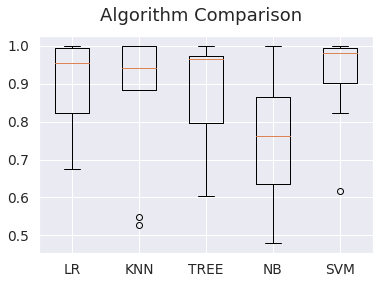

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
seed=6
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('TREE', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Logistic reg

[1 1 1 ... 1 0 1]
[[166  26]
 [ 16 879]]
              precision    recall  f1-score   support

          NO       0.91      0.86      0.89       192
         YES       0.97      0.98      0.98       895

    accuracy                           0.96      1087
   macro avg       0.94      0.92      0.93      1087
weighted avg       0.96      0.96      0.96      1087



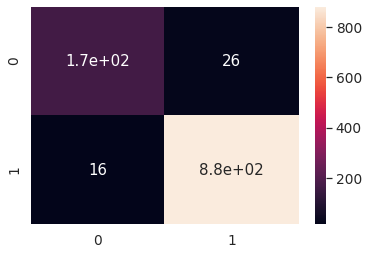

In [ ]:
#dtree=DecisionTreeClassifier()
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import pickle
from sklearn.externals import joblib

logreg=LogisticRegression()
logreg.fit(X_train,y_train)

#print('Decision Tree Classifer Created')
#Predict the response for test dataset
y_pred = logreg.predict(X_test)
print(y_pred)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
print(cm)
target_names=['NO','YES']
print(classification_report(y_test,y_pred,target_names=target_names))

In [ ]:
df.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [ ]:
p=['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Chronic Lung Disease', 'Headache',
       'Heart Disease',  'Fatigue ',
       'Attended Large Gathering',]

In [ ]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
# Visualize the graph
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, feature_names=p,  
                filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

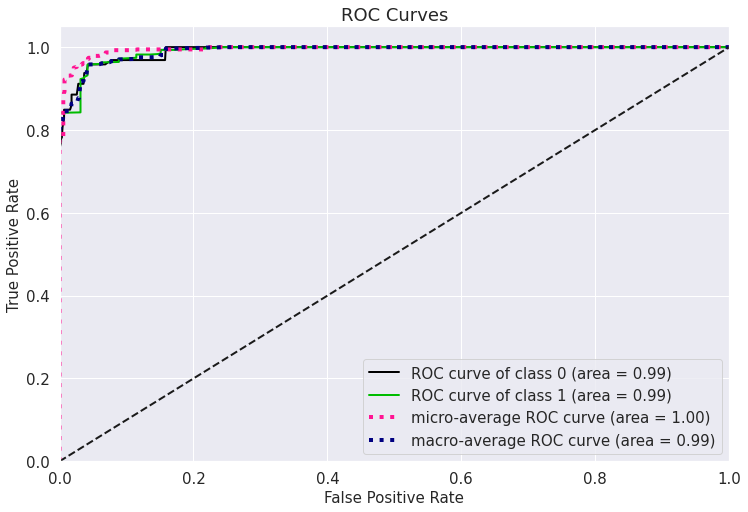

In [ ]:
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
plot_roc_curve(y_test, probs)

plt.show()

In [ ]:
! pip install ggplot
import sklearn.metrics as metrics

# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
from ggplot import *
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

decision tree

Decision Tree Classifer Created
[1 1 1 ... 1 0 1]
[[184   8]
 [ 12 883]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       192
           1       0.99      0.99      0.99       895

    accuracy                           0.98      1087
   macro avg       0.96      0.97      0.97      1087
weighted avg       0.98      0.98      0.98      1087



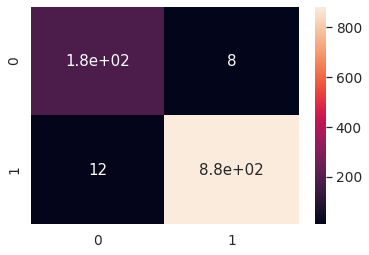

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

print('Decision Tree Classifer Created')
#Predict the response for test dataset
y_pred = dtree.predict(X_test)
print(y_pred)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
print(cm)
print(classification_report(y_test,y_pred))

In [ ]:
target_names=['NO','YES']
print(classification_report(y_test,y_pred,target_names=target_names))

              precision    recall  f1-score   support

          NO       0.94      0.96      0.95       192
         YES       0.99      0.99      0.99       895

    accuracy                           0.98      1087
   macro avg       0.96      0.97      0.97      1087
weighted avg       0.98      0.98      0.98      1087



In [ ]:
! pip install ggplot
import sklearn.metrics as metrics

# calculate the fpr and tpr for all thresholds of the classification
probs = dtree.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
from ggplot import *
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

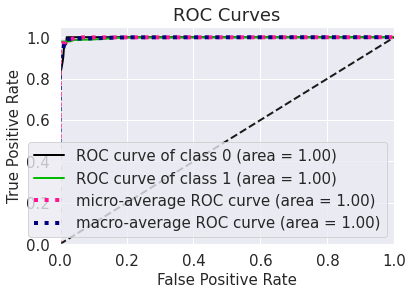

In [ ]:
probs = dtree.predict_proba(X_test)
preds = probs[:,1]
plot_roc_curve(y_test, probs)
plt.show()

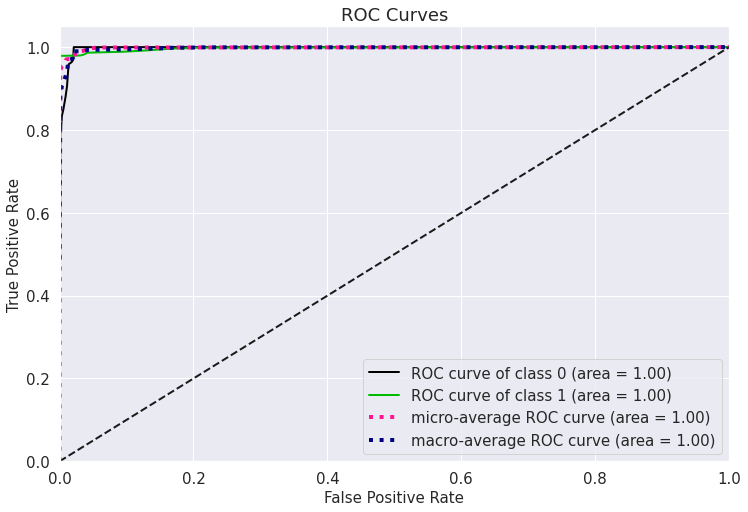

In [ ]:
probs = dtree.predict_proba(X_test)
preds = probs[:,1]
plot_roc_curve(y_test, probs)
plt.show()

svm

In [ ]:
from sklearn.svm import SVC
s=SVC()
#dtree=DecisionTreeClassifier()
s.fit(X_train,y_train)

#print('Decision Tree Classifer Created')
#Predict the response for test dataset
y_pred = s.predict(X_test)
print(y_pred)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
print(cm)
target_names=['NO','YES']
print(classification_report(y_test,y_pred,target_names=target_names))
#print(classification_report(y_test,y_pred))
probs = s.predict_proba(X_test)
preds = probs[:,1]
plot_roc_curve(y_test, probs)
plt.show()

[1 1 1 ... 1 0 1]
[[179  13]
 [ 11 884]]
              precision    recall  f1-score   support

          NO       0.94      0.93      0.94       192
         YES       0.99      0.99      0.99       895

    accuracy                           0.98      1087
   macro avg       0.96      0.96      0.96      1087
weighted avg       0.98      0.98      0.98      1087



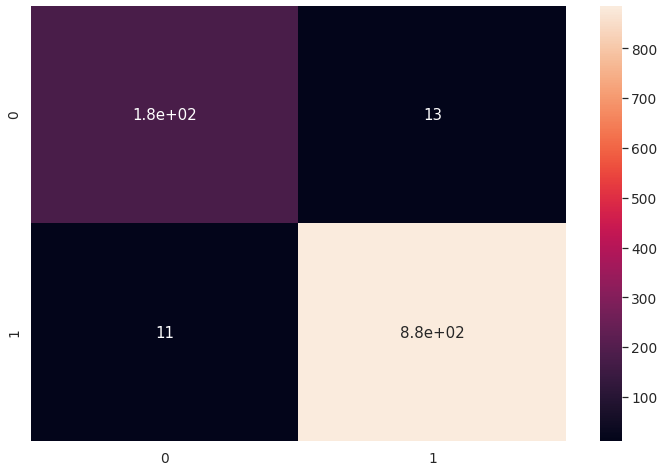

In [ ]:
from sklearn.svm import SVC
s=SVC()
#dtree=DecisionTreeClassifier()
s.fit(X_train,y_train)

#print('Decision Tree Classifer Created')
#Predict the response for test dataset
y_pred = s.predict(X_test)
print(y_pred)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
print(cm)
target_names=['NO','YES']
print(classification_report(y_test,y_pred,target_names=target_names))

In [ ]:
import pickle
 
# Save the trained model as a pickle string.
saved_model = pickle.dumps(s)

In [ ]:
from sklearn.externals import joblib
 
# Save the model as a pickle in a file
joblib.dump(s, 'symptom_auditor.pkl')

['symptom_auditor.pkl']

In [ ]:
#Visulaizing the trianing set result  
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  
from matplotlib.colors import ListedColormap  
x_set, y_set = X_train, y_train  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, s.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)  
mtp.title('SVM')  

mtp.legend()  
mtp.show()  

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
error_rate = []
# Will take some time
for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

''' 
classifier= KNeighborsClassifier(n_neighbors=5, p=2 )  
classifier.fit(x_train, y_train)  
'''
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
! pip install ggplot
import sklearn.metrics as metrics

# calculate the fpr and tpr for all thresholds of the classification
probs = s.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
from ggplot import *
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

gaussian nb

[1 1 0 ... 1 0 1]
[[192   0]
 [270 625]]
              precision    recall  f1-score   support

           0       0.42      1.00      0.59       192
           1       1.00      0.70      0.82       895

    accuracy                           0.75      1087
   macro avg       0.71      0.85      0.70      1087
weighted avg       0.90      0.75      0.78      1087



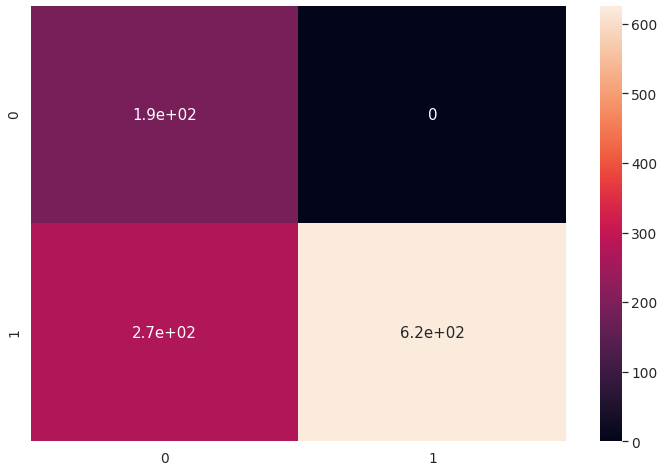

In [ ]:
from sklearn.naive_bayes import GaussianNB
g=GaussianNB()
#dtree=DecisionTreeClassifier()
g.fit(X_train,y_train)

#print('Decision Tree Classifer Created')
#Predict the response for test dataset
y_pred = g.predict(X_test)
print(y_pred)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
print(cm)

print(classification_report(y_test,y_pred))